In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/prepared/prepared_rfm_1.csv')

In [3]:
data.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>RecencyScore</th>
      <th>FrequencyScore</th>
      <th>MonetaryScore</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>12346.0</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
    </tr>
  </tbody>
</table>
</div>

In [4]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score


In [5]:
K_values = range(2, 10, 1)
progress = 0
scores = []
for K in K_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data)
    # clusters = kmeans.transform(data)
    score = silhouette_score(data, kmeans.labels_)
    scores.append(score)
    
    progress += 1
    print ('\r' + str(int(100 * progress / len(K_values))), end='%')

    
    

12%

25%

37%

50%

62%

75%

87%

100%

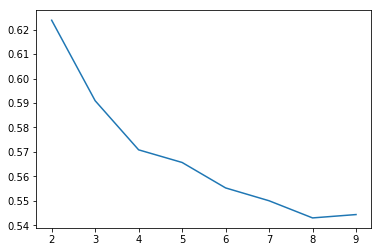

In [6]:
plt.plot(K_values, scores)


In [7]:
scores, list(K_values)

([0.6238499887126046,
  0.5909484316996665,
  0.5708670626096739,
  0.5657002237311862,
  0.5552967529475735,
  0.5500432245815237,
  0.5430316744345751,
  0.5444043084642592],
 [2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
best_value = K_values[[i for i, j in enumerate(scores) if j == max(scores)][0]] # !
# best_value=4
kmeans = KMeans(n_clusters=K)
kmeans.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
clusters_df = pd.DataFrame()

In [10]:
clusters_df['SegmentNo'] = kmeans.labels_

In [14]:
clusters_df['CustomerID'] = data['CustomerID']

In [15]:
clusters_df.to_csv('./results/segments_rfm_1.csv', index=False)